## EVALUATION NOTEBOOK

### Transsprition Results

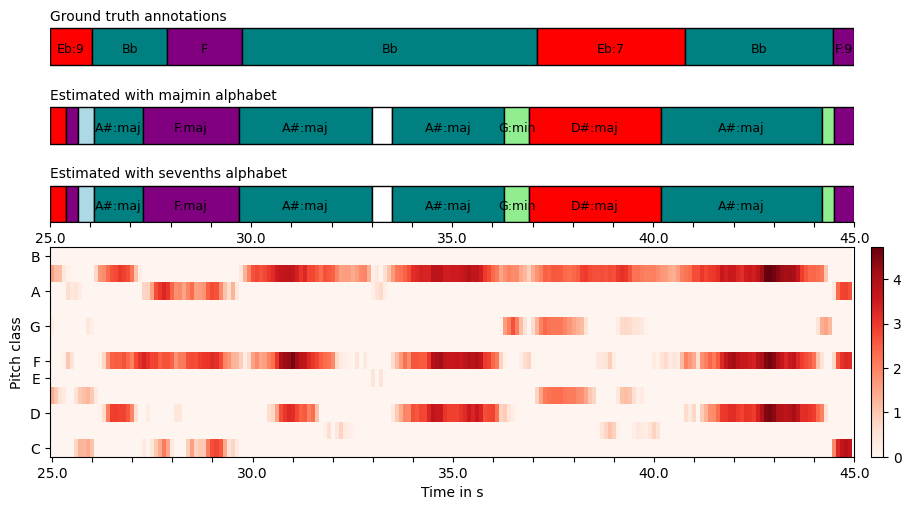

In [1]:
from visualization import visualizationApp
%matplotlib inline
visualizationApp("/home/max/ET-TI/Masterarbeit/chord-recognition/results");

### Chromagram analysis

Dropdown(description='Chord:', options=('C:maj', 'C:min', 'C:min7', 'C:7', 'C:maj7', 'N', 'C:sus4', 'C:maj6', …

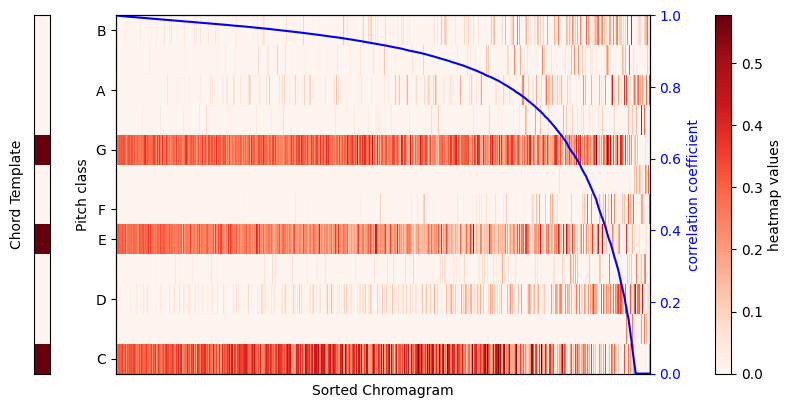

Output()

/home/max/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [3]:
from visualization import chromaApp
%matplotlib inline
# set path to chromadata fileshape
filepath = "/home/max/ET-TI/Masterarbeit/chord-recognition/models/chromadata_root_invariant_median.hdf5" 

chromaApp(filepath);

In [15]:

def create_violinplot(ax,data,xlabels,bodycolor='cyan'):
    violin_parts = ax.violinplot(data,showmeans=False, showmedians=True,
            showextrema=False)
    violin_parts["cmedians"].set_color("red")
    for x in violin_parts["bodies"]:
        x.set_color(bodycolor)
    bplot_parts = ax.boxplot(data,
                showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
                flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
                widths=0.1)
    ax.set_yticks(np.arange(0,110,10))
    ax.set_ylim(0,100)
    ax.set_ylabel("F-score in %")
    ax.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
    ax.set_xlim(0.5, len(xlabels) + 0.5);
    ax.grid("on")
    return violin_parts, bplot_parts


### Comparison of results between rp and median filtering and the deep chroma processor

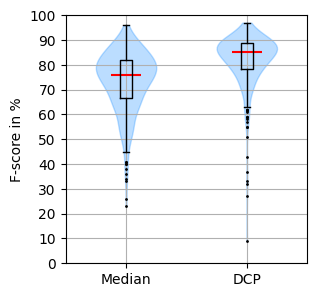

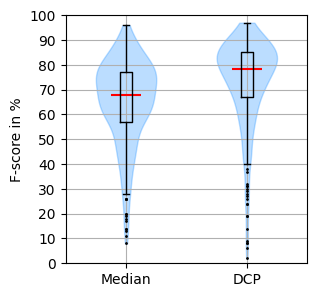

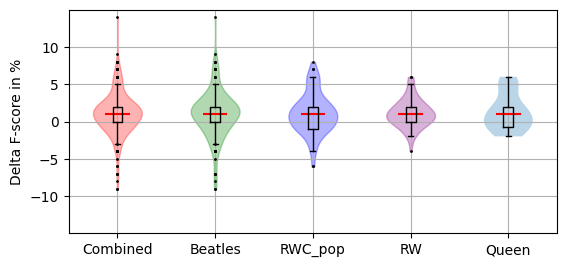

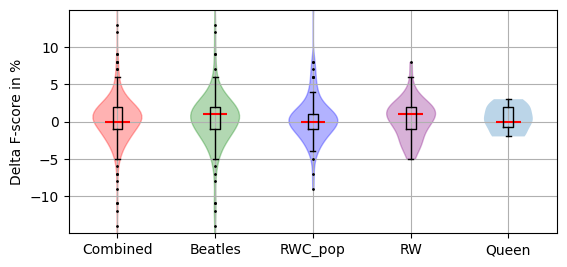

In [27]:
from visualization import load_results
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


results_median,datasets = load_results("/home/max/ET-TI/Masterarbeit/chord-recognition/results/median_none.hdf5")
results_rp,_ = load_results("/home/max/ET-TI/Masterarbeit/chord-recognition/results/rp_none.hdf5")
results_dcp,_ = load_results("/home/max/ET-TI/Masterarbeit/chord-recognition/results/dcp_none.hdf5")


outliers = ['03_-_Anna_(Go_To_Him)', # tuning issues
            '10_-_Lovely_Rita', # tuning issues
            'CD1_-_05_-_Wild_Honey_Pie', # little harmonic content
            'CD1_-_06_-_The_Continuing_Story_of_Bungalow_Bill', # TODO: find out why the annotations are wrong.. chroma issues? 
            'CD2_-_12_-_Revolution_9',  # little harmonic content
            '08_-_Within_You_Without_You', # leslie effect on piano => bad chroma
            '02 Another One Bites The Dust', # little harmonic content
            '16 We Will Rock You', # little harmonic content
            "Stalker's Day Off (I've Been Hanging Around)", # faulty audio / issues with annotations
            'Stand Your Ground'  # faulty audio / issues with annotations
]
results_median = [x for x in results_median if x.name not in outliers]
results_rp = [x for x in results_rp if x.name not in outliers]
               
majmin_dcp = [100*x.majmin_f for x in results_dcp]
sevenths_dcp = [100*x.sevenths_f for x in results_dcp]

comparison_median_dcp = [(x,y) for x,y in zip(results_median,results_dcp) if x.majmin_f > y.majmin_f ]
# for data in comparison_median_dcp:
#     print(f"{data[0].name} -{data[0].track_id} - MEDIAN: {data[0].majmin_f} , DCP: {data[1].majmin_f}")

majmin_f_median = [100*x.majmin_f for x in results_median]
sevenths_f_median = [100*x.sevenths_f for x in results_median]
majmin_f_rp = [100*x.majmin_f for x in results_rp]
sevenths_f_rp = [100*x.sevenths_f for x in results_rp]

fig, ax = plt.subplots(figsize=(3, 2.8))
create_violinplot(ax,[majmin_f_median,majmin_dcp],["Median","DCP"],"DodgerBlue")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_majmin_result.png")

fig, ax = plt.subplots(figsize=(3, 2.8))
create_violinplot(ax,[sevenths_f_median,sevenths_dcp],["Median","DCP"],"DodgerBlue")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_sevenths_result.png")

majmin_f = [100*x.majmin_f for x in results_median if x.name not in outliers]
majmin_f_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers]
beatles_f = [100*x.majmin_f for x in results_median if x.name not in outliers and x.dataset == "beatles"]
beatles_f_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers and x.dataset == "beatles"]
rwc_f = [100*x.majmin_f for x in results_median if x.name not in outliers and x.dataset == "rwc_pop"]
rwc_f_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f = [100*x.majmin_f for x in results_median if x.name not in outliers and x.dataset == "rw"]
rw_f_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers and x.dataset == "rw"]
queen_f = [100*x.majmin_f for x in results_median if x.name not in outliers and x.dataset == "queen"]
queen_f_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers and x.dataset == "queen"]

majmin_f_sev = [100*x.sevenths_f for x in results_median if x.name not in outliers]
majmin_f_rp_sev = [100*x.sevenths_f for x in results_rp if x.name not in outliers]
beatles_f_sev = [100*x.sevenths_f for x in results_median if x.name not in outliers and x.dataset == "beatles"]
beatles_f_rp_sev = [100*x.sevenths_f for x in results_rp if x.name not in outliers and x.dataset == "beatles"]
rwc_f_sev = [100*x.sevenths_f for x in results_median if x.name not in outliers and x.dataset == "rwc_pop"]
rwc_f_rp_sev = [100*x.sevenths_f for x in results_rp if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f_sev = [100*x.sevenths_f for x in results_median if x.name not in outliers and x.dataset == "rw"]
rw_f_rp_sev = [100*x.sevenths_f for x in results_rp if x.name not in outliers and x.dataset == "rw"]
queen_f_sev = [100*x.sevenths_f for x in results_median if x.name not in outliers and x.dataset == "queen"]
queen_f_rp_sev = [100*x.sevenths_f for x in results_rp if x.name not in outliers and x.dataset == "queen"]

delta_f = [x-y for x,y in zip(majmin_f_rp,majmin_f)]
beatles_delta = [x-y for x,y in zip(beatles_f_rp,beatles_f)]
rwc_delta = [x-y for x,y in zip(rwc_f_rp,rwc_f)]
rw_delta = [x-y for x,y in zip(rw_f_rp,rw_f)]
queen_delta = [x-y for x,y in zip(queen_f_rp,queen_f)]
data = [delta_f,beatles_delta,rwc_delta,rw_delta,queen_delta]
xlabels = ["Combined","Beatles", "RWC_pop","RW","Queen"]

fig,ax =fig, ax = plt.subplots(figsize=(5.5, 2.5))
violin_parts = ax.violinplot(data,showmeans=False, showmedians=True,
        showextrema=False)
violin_parts["cmedians"].set_color("red")
for x,color in zip(violin_parts["bodies"],['r','g','b','purple']):
    x.set_color(color)
bplot_parts = ax.boxplot(data,
            showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
            flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
            widths=0.1)
ax.set_yticks(np.arange(-10,15,5))
ax.set_ylim(-15,15)
ax.set_ylabel("Delta F-score in %")
ax.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax.set_xlim(0.5, len(xlabels) + 0.5);
ax.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_dataset.png")


delta_f = [x-y for x,y in zip(majmin_f_rp_sev,majmin_f_sev)]
beatles_delta = [x-y for x,y in zip(beatles_f_rp_sev,beatles_f_sev)]
rwc_delta = [x-y for x,y in zip(rwc_f_rp_sev,rwc_f_sev)]
rw_delta = [x-y for x,y in zip(rw_f_rp_sev,rw_f_sev)]
queen_delta = [x-y for x,y in zip(queen_f_rp_sev,queen_f_sev)]
data = [delta_f,beatles_delta,rwc_delta,rw_delta,queen_delta]
xlabels = ["Combined","Beatles", "RWC_pop","RW","Queen"]

fig,ax =fig, ax = plt.subplots(figsize=(5.5, 2.5))
violin_parts = ax.violinplot(data,showmeans=False, showmedians=True,
        showextrema=False)
violin_parts["cmedians"].set_color("red")
for x,color in zip(violin_parts["bodies"],['r','g','b','purple']):
    x.set_color(color)
bplot_parts = ax.boxplot(data,
            showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
            flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
            widths=0.1)
ax.set_yticks(np.arange(-10,15,5))
ax.set_ylim(-15,15)
ax.set_ylabel("Delta F-score in %")
ax.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax.set_xlim(0.5, len(xlabels) + 0.5);
ax.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_dataset_sevenths.png")


# Wilcoxon test
A Wilcoxon signed-rank test was calculated to examine the effect of using a recurrency plot to smooth the chromagram instead of horizontal median filters. The transcription result measured are compared with the F-scores using the majmin alphabet. The distribution of the paired differences was symmetrical following visual inspection of the histogram. There was a statistically significant increase in F-scores (Mdn = 77.0%) using the recurrency plot compared to the use of median filters (Mdn = 75.5%), t = 12175.0, p < .001

Wilcoxon test for paired samples
Majmin: z=-7.3, p=0.000, r=0.39
Sevenths: z=-2.0, p=0.045, r=0.11


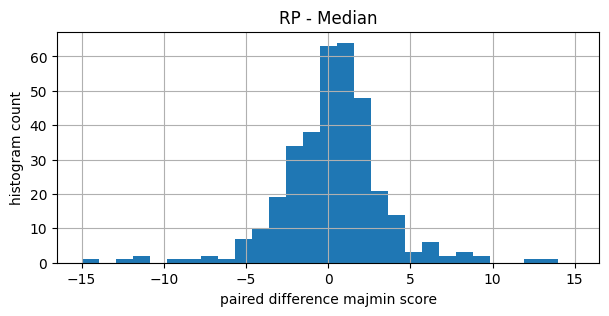

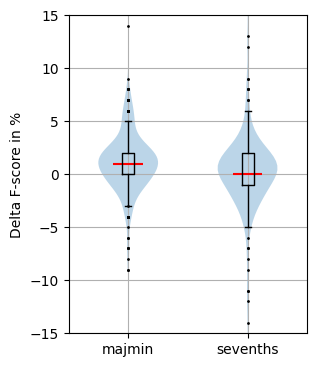

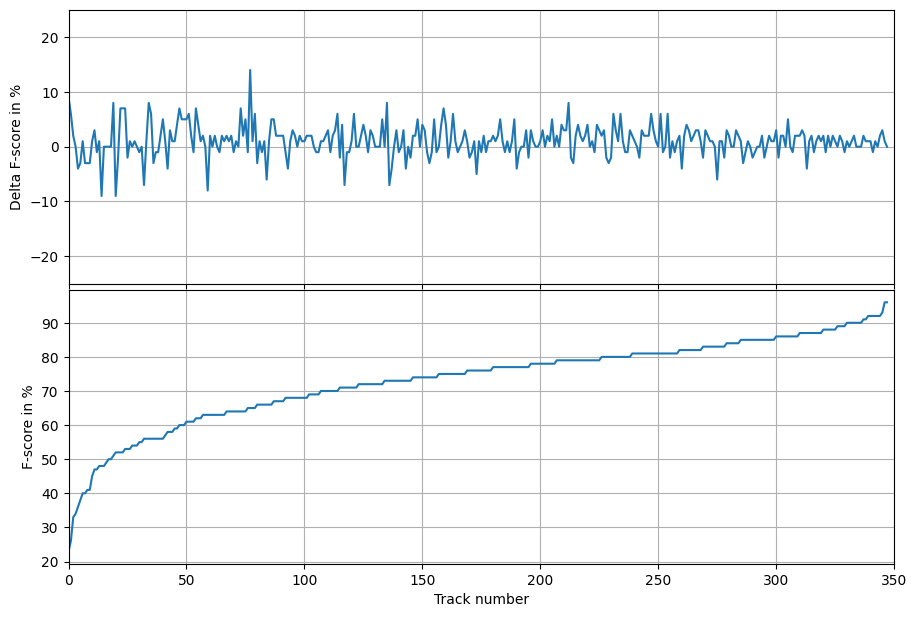

In [28]:
diff = [x - y for x,y in zip(majmin_f_rp, majmin_f_median)]
diff_sorted = sorted([(y,x-y) for x,y in zip(majmin_f_rp, majmin_f_median)],key=lambda x:x[0])

diff_sevenths = [x - y for x,y in zip(sevenths_f_rp,sevenths_f_median)]
fig,ax = plt.subplots(figsize=(7,3))
ax.grid(True)
ax.hist(diff_sevenths,bins=np.linspace(-15,15,30))
ax.set_ylabel("histogram count")
ax.set_xlabel("paired difference majmin score")
ax.set_title("RP - Median")
res = stats.wilcoxon(diff,method='approx')
res_sevenths = stats.wilcoxon(diff_sevenths,method='approx')

print("Wilcoxon test for paired samples")
print(f"Majmin: z={res.zstatistic:0.1f}, p={res.pvalue:0.3f}, r={np.abs(res.zstatistic) / np.sqrt(len(diff)):0.2f}")
print(f"Sevenths: z={res_sevenths.zstatistic:0.1f}, p={res_sevenths.pvalue:0.3f}, r={np.abs(res_sevenths.zstatistic) / np.sqrt(len(diff)):0.2f}")


fig, ax1 = plt.subplots(figsize=(3, 3.5))
parts = ax1.violinplot([diff,diff_sevenths],showmeans=False, showmedians=True,
        showextrema=False)
bplot = ax1.boxplot([diff,diff_sevenths],widths=0.1,showfliers=True,medianprops=dict(linestyle=None,linewidth=0),flierprops=dict(markerfacecolor='k', marker='o',markersize=1))
parts["cmedians"].set_color("red")
xlabels = ["majmin","sevenths"]
ax1.set_yticks(np.arange(-20,30,5))
ax1.set_ylim(-15,15)
ax1.set_ylabel("Delta F-score in %")
ax1.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax1.set_xlim(0.5, len(xlabels) + 0.5);
ax1.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_delta.png")

# sort results by f-scores in ascending order
majmin_sorted = [x[0] for x in diff_sorted]
delta = [x[1] for x in diff_sorted]
fig,(ax0,ax1) = plt.subplots(2,1,figsize=(9,6),sharex=True)
ax0.plot(delta)
ax0.grid("on")
ax0.set_ylim(-25,25)
ax0.set_ylabel("Delta F-score in %")
ax1.plot(majmin_sorted)
ax1.set_ylabel("F-score in %")
ax1.set_xlim(0,350)
ax1.set_xlabel("Track number")
ax1.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/median_rp_sorted_delta.png")


### Study on source separation

Majmin
Wilcoxon test for paired samples
comparison mix/no vocals: N=348, z=-1.9, p=0.054, r=0.10
comparison mix/no drums: N=348, z=-6.1, p=0.000, r=0.33
comparison mix/no vocals and drums: N=348, z=-6.4, p=0.000, r=0.34
comparison no drums / no drums and no vocals: N=348, z=-2.2, p=0.028, r=0.12


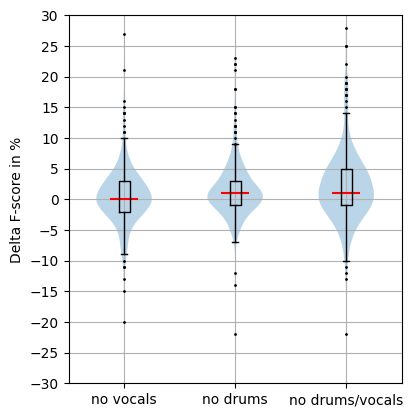

In [29]:
results = {}
for source_sep in ["none","vocals","drums","both"]:
        results[source_sep], datasets = load_results(f"/home/max/ET-TI/Masterarbeit/results/median_{source_sep}")

results_rp,_ = load_results("/home/max/ET-TI/Masterarbeit/results/rp_none")
# list of tracks that should be excluded due to issues with the annotations / or lack of harmonic content
outliers = ['03_-_Anna_(Go_To_Him)', # tuning issues
            '10_-_Lovely_Rita', # tuning issues
            'CD1_-_05_-_Wild_Honey_Pie', # little harmonic content
            'CD1_-_06_-_The_Continuing_Story_of_Bungalow_Bill', # faulty audio or annotations
            'CD2_-_12_-_Revolution_9',  # little harmonic content
            '08_-_Within_You_Without_You', # leslie effect on piano => bad chroma
            '02 Another One Bites The Dust', # little harmonic content
            '16 We Will Rock You', # little harmonic content
            "Stalker's Day Off (I've Been Hanging Around)", # faulty audio / issues with annotations
            'Stand Your Ground'  # faulty audio / issues with annotations
]

majmin_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers]
majmin_rp = [100*x.majmin_f for x in results_rp if x.name not in outliers]
majmin_vocals = [100*x.majmin_f for x in results["vocals"] if x.name not in outliers]
majmin_drums = [100*x.majmin_f for x in results["drums"] if x.name not in outliers]
majmin_both = [100*x.majmin_f for x in results["both"] if x.name not in outliers]
sevenths_none = [100*x.sevenths_f for x in results["none"] if x.name not in outliers]
sevenths_vocals = [100*x.sevenths_f for x in results["vocals"] if x.name not in outliers]
sevenths_drums = [100*x.sevenths_f for x in results["drums"] if x.name not in outliers]
sevenths_both = [100*x.sevenths_f for x in results["both"] if x.name not in outliers]

delta_median_rp = [x-y for x,y in zip(majmin_f_rp, majmin_f_median)]
delta_majmin_vocals = [y-x for x,y in zip(majmin_none,majmin_vocals)]
delta_majmin_drums = [y-x for x,y in zip(majmin_none,majmin_drums)]
delta_majmin_both = [y-x for x,y in zip(majmin_none,majmin_both)]

fig, ax1 = plt.subplots(figsize=(4, 4))
parts = ax1.violinplot([delta_majmin_vocals,delta_majmin_drums,delta_majmin_both],showmeans=False, showmedians=True,
        showextrema=False)
bplot = ax1.boxplot([delta_majmin_vocals,delta_majmin_drums,delta_majmin_both],
                    showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
                    flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
                    widths=0.1)
parts["cmedians"].set_color("red")
xlabels = ["no vocals","no drums","no drums/vocals"]
ax1.set_yticks(np.arange(-35,35,5))
ax1.set_ylim(-30,30)
ax1.set_ylabel("Delta F-score in %")
ax1.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax1.set_xlim(0.5, len(xlabels) + 0.5);
ax1.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig("/home/max/ET-TI/Masterarbeit/latex/figures/source_separation_majmin_result.png")

delta_drums_vocals = [y-x for x,y in zip(majmin_both,majmin_drums)]
print("Majmin")
res_v = stats.wilcoxon(delta_majmin_vocals,method='approx')
res_d = stats.wilcoxon(delta_majmin_drums,method='approx')
res_h = stats.wilcoxon(delta_majmin_both,method='approx')
res_dv = stats.wilcoxon(delta_drums_vocals,method='approx')

print("Wilcoxon test for paired samples")
print(f"comparison mix/no vocals: N={len(delta_majmin_vocals)}, z={res_v.zstatistic:0.1f}, p={res_v.pvalue:0.3f}, r={np.abs(res_v.zstatistic) / np.sqrt(len(delta_majmin_vocals)):0.2f}")
print(f"comparison mix/no drums: N={len(delta_majmin_vocals)}, z={res_d.zstatistic:0.1f}, p={res_d.pvalue:0.3f}, r={np.abs(res_d.zstatistic) / np.sqrt(len(delta_majmin_vocals)):0.2f}")
print(f"comparison mix/no vocals and drums: N={len(delta_majmin_vocals)}, z={res_h.zstatistic:0.1f}, p={res_h.pvalue:0.3f}, r={np.abs(res_h.zstatistic) / np.sqrt(len(delta_majmin_vocals)):0.2f}")
print(f"comparison no drums / no drums and no vocals: N={len(delta_majmin_vocals)}, z={res_dv.zstatistic:0.1f}, p={res_dv.pvalue:0.3f}, r={np.abs(res_dv.zstatistic) / np.sqrt(len(delta_majmin_vocals)):0.2f}")


Majmin: separation both
Wilcoxon test for paired samples
beatles: N=171 z=-1.3, p=0.187, r=0.10
median: 77.0 +- 12.0
rwc: N=98, z=-5.4, p=0.000, r=0.55
median: 78.5 +- 14.0
rw: N=61, z=-4.9, p=0.000, r=0.63
median: 81.0 +- 12.0
queen: N=18, z=-2.5, p=0.013, r=0.59
median: 74.5 +- 16.75


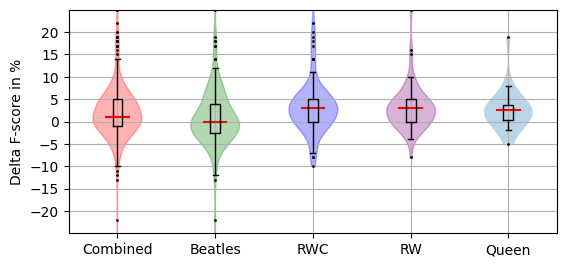

In [34]:
## Dataset specific eximination
separation_method = "both"

f_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers]
beatles_f_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers and x.dataset == "beatles"]
rwc_f_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers and x.dataset == "rw"]
queen_f_none = [100*x.majmin_f for x in results["none"] if x.name not in outliers and x.dataset == "queen"]

f_separated = [100*x.majmin_f for x in results[separation_method] if x.name not in outliers]
beatles_f = [100*x.majmin_f for x in results[separation_method] if x.name not in outliers and x.dataset == "beatles"]
rwc_f = [100*x.majmin_f for x in results[separation_method] if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f = [100*x.majmin_f for x in results[separation_method] if x.name not in outliers and x.dataset == "rw"]
queen_f = [100*x.majmin_f for x in results[separation_method] if x.name not in outliers and x.dataset == "queen"]

delta = [x-y for x,y in zip(f_separated,f_none)]
beatles_delta = [x-y for x,y in zip(beatles_f,beatles_f_none)]
rwc_delta = [x-y for x,y in zip(rwc_f,rwc_f_none)]
rw_delta = [x-y for x,y in zip(rw_f,rw_f_none)]
queen_delta = [x-y for x,y in zip(queen_f,queen_f_none)]

fig, ax1 = plt.subplots(figsize=(5.5, 2.5))
parts = ax1.violinplot([delta,beatles_delta, rwc_delta, rw_delta, queen_delta],showmeans=False, showmedians=True,
        showextrema=False)
bplot = ax1.boxplot([delta,beatles_delta, rwc_delta, rw_delta, queen_delta],
                    showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
                    flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
                    widths=0.1)
parts["cmedians"].set_color("red")
for x,color in zip(parts["bodies"],['r','g','b','purple']):
    x.set_color(color)
xlabels = ["Combined","Beatles","RWC","RW","Queen"]
ax1.set_yticks(np.arange(-20,25,5))
ax1.set_ylim(-25,25)
ax1.set_ylabel("Delta F-score in %")
ax1.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax1.set_xlim(0.5, len(xlabels) + 0.5);
ax1.grid("on")
fig.tight_layout(pad=0.1)


med_seg_sevenths = 100 * np.median(beatles_f)
iqr_seg_sevenths = 100 * np.subtract(*np.percentile(beatles_f, [75, 25]))

fig.savefig(f"/home/max/ET-TI/Masterarbeit/latex/figures/separation_{separation_method}_delta.png")
print(f"Majmin: separation {separation_method}")
res_beatles = stats.wilcoxon(beatles_delta,method='approx')
res_rwc = stats.wilcoxon(rwc_delta,method='approx')
res_rw = stats.wilcoxon(rw_delta,method='approx')
res_queen = stats.wilcoxon(queen_delta,method='approx')
print("Wilcoxon test for paired samples")
print(f"beatles: N={len(beatles_delta)} z={res_beatles.zstatistic:0.1f}, p={res_beatles.pvalue:0.3f}, r={np.abs(res_beatles.zstatistic) / np.sqrt(len(beatles_delta)):0.2f}")
print(f"median: {np.median(beatles_f)} +- {np.subtract(*np.percentile(beatles_f, [75, 25]))}")
print(f"rwc: N={len(rwc_delta)}, z={res_rwc.zstatistic:0.1f}, p={res_rwc.pvalue:0.3f}, r={np.abs(res_rwc.zstatistic) / np.sqrt(len(rwc_delta)):0.2f}")
print(f"median: {np.median(rwc_f)} +- {np.subtract(*np.percentile(rwc_f, [75, 25]))}")
print(f"rw: N={len(rw_delta)}, z={res_rw.zstatistic:0.1f}, p={res_rw.pvalue:0.3f}, r={np.abs(res_rw.zstatistic) / np.sqrt(len(rw_delta)):0.2f}")
print(f"median: {np.median(rw_f)} +- {np.subtract(*np.percentile(rw_f, [75, 25]))}")
print(f"queen: N={len(queen_delta)}, z={res_queen.zstatistic:0.1f}, p={res_queen.pvalue:0.3f}, r={np.abs(res_queen.zstatistic) / np.sqrt(len(queen_delta)):0.2f}")
print(f"median: {np.median(queen_f)} +- {np.subtract(*np.percentile(queen_f, [75, 25]))}")

In [ ]:
print("Bigram analysis DEMO")
import train
import numpy as np
import matplotlib.pyplot as plt

A = train.bigramAnalysis(["beatles"],split=0)
fig,(ax,ax_cbar) = plt.subplots(1,2,width_ratios=(10,0.5),figsize=(7,6))
img = ax.imshow(20*np.log10(A.T+np.finfo(float).eps),origin="lower",vmin=-140)
ticklabels = ["C","D","E","F","G","A","B","c","d","e","f","g","a","b","N"]
ticks = [0,2,4,5,7,9,11,12,14,16,17,19,21,23,24]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
plt.colorbar(img,cax=ax_cbar)
ax_cbar.set_ylabel("Log10 probability")
fig.tight_layout()
plt.show()

#### Study on correlation vs inner product

In [4]:
from visualization import load_results
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

results_inner,_ = load_results("/home/max/ET-TI/Masterarbeit/chord-recognition/results/median_drums.hdf5")
results_corr,_ = load_results("/home/max/ET-TI/Masterarbeit/chord-recognition/results/correlation_median_drums.hdf5")
# list of tracks that should be excluded due to issues with the annotations / or lack of harmonic content
outliers = ['03_-_Anna_(Go_To_Him)', # tuning issues
            '10_-_Lovely_Rita', # tuning issues
            'CD1_-_05_-_Wild_Honey_Pie', # little harmonic content
            'CD1_-_06_-_The_Continuing_Story_of_Bungalow_Bill', # faulty audio or annotations
            'CD2_-_12_-_Revolution_9',  # little harmonic content
            '08_-_Within_You_Without_You', # leslie effect on piano => bad chroma
            '02 Another One Bites The Dust', # little harmonic content
            '16 We Will Rock You', # little harmonic content
            "Stalker's Day Off (I've Been Hanging Around)", # faulty audio / issues with annotations
            'Stand Your Ground'  # faulty audio / issues with annotations
]

majmin_inner = [100*x.majmin_f for x in results_inner if x.name not in outliers]
majmin_corr = [100*x.majmin_f for x in results_corr if x.name not in outliers]

sevenths_inner = [x for x in results_inner if x.name not in outliers]
sevenths_corr = [x for x in results_corr if x.name not in outliers]


f_none = [100*x.sevenths_f for x in results_inner if x.name not in outliers]
beatles_f_none = [100*x.sevenths_f for x in results_inner if x.name not in outliers and x.dataset == "beatles"]
rwc_f_none = [100*x.sevenths_f for x in results_inner if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f_none = [100*x.sevenths_f for x in results_inner if x.name not in outliers and x.dataset == "rw"]
queen_f_none = [100*x.sevenths_f for x in results_inner if x.name not in outliers and x.dataset == "queen"]

f_separated = [100*x.sevenths_f for x in results_corr if x.name not in outliers]
beatles_f = [100*x.sevenths_f for x in results_corr if x.name not in outliers and x.dataset == "beatles"]
rwc_f = [100*x.sevenths_f for x in results_corr if x.name not in outliers and x.dataset == "rwc_pop"]
rw_f = [100*x.sevenths_f for x in results_corr if x.name not in outliers and x.dataset == "rw"]
queen_f = [100*x.sevenths_f for x in results_corr if x.name not in outliers and x.dataset == "queen"]

delta = [x-y for x,y in zip(f_separated,f_none)]
beatles_delta = [x-y for x,y in zip(beatles_f,beatles_f_none)]
rwc_delta = [x-y for x,y in zip(rwc_f,rwc_f_none)]
rw_delta = [x-y for x,y in zip(rw_f,rw_f_none)]
queen_delta = [x-y for x,y in zip(queen_f,queen_f_none)]
delta_sorted = sorted([(y.majmin_f,100 * (x.sevenths_f-y.sevenths_f),x.name,y.name) for x,y in zip(sevenths_corr, sevenths_inner)],key=lambda x:x[0])


fig, ax1 = plt.subplots(figsize=(5.5, 2.5))
parts = ax1.violinplot([delta,beatles_delta, rwc_delta, rw_delta, queen_delta],showmeans=False, showmedians=True,
        showextrema=False)
bplot = ax1.boxplot([delta,beatles_delta, rwc_delta, rw_delta, queen_delta],
                    showfliers=True,medianprops=dict(linestyle=None,linewidth=0),
                    flierprops=dict(markerfacecolor='k', marker='o',markersize=1),
                    widths=0.1)
parts["cmedians"].set_color("red")
for x,color in zip(parts["bodies"],['r','g','b','purple']):
    x.set_color(color)
xlabels = ["Combined","Beatles","RWC","RW","Queen"]
ax1.set_yticks(np.arange(-35,40,5))
ax1.set_ylim(-35,35)
ax1.set_ylabel("Delta F-score in %")
ax1.set_xticks(np.arange(1, len(xlabels) + 1), labels=xlabels)
ax1.set_xlim(0.5, len(xlabels) + 0.5);
ax1.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig(f"/home/max/ET-TI/Masterarbeit/latex/figures/correlation_delta.png")

print(f"Majmin: corr")
res = stats.wilcoxon(delta,method='approx')
res_beatles = stats.wilcoxon(beatles_delta,method='approx')
res_rwc = stats.wilcoxon(rwc_delta,method='approx')
res_rw = stats.wilcoxon(rw_delta,method='approx')
res_queen = stats.wilcoxon(queen_delta,method='approx')
print("Wilcoxon test for paired samples")
print(f"combined: N={len(delta)} z={res.zstatistic:0.1f}, p={res.pvalue:0.3f}, r={np.abs(res.zstatistic) / np.sqrt(len(delta)):0.2f}")
print(f"beatles: N={len(beatles_delta)} z={res_beatles.zstatistic:0.1f}, p={res_beatles.pvalue:0.3f}, r={np.abs(res_beatles.zstatistic) / np.sqrt(len(beatles_delta)):0.2f}")
print(f"rwc: N={len(rwc_delta)}, z={res_rwc.zstatistic:0.1f}, p={res_rwc.pvalue:0.3f}, r={np.abs(res_rwc.zstatistic) / np.sqrt(len(rwc_delta)):0.2f}")
print(f"rw: N={len(rw_delta)}, z={res_rw.zstatistic:0.1f}, p={res_rw.pvalue:0.3f}, r={np.abs(res_rw.zstatistic) / np.sqrt(len(rw_delta)):0.2f}")
print(f"queen: N={len(queen_delta)}, z={res_queen.zstatistic:0.1f}, p={res_queen.pvalue:0.3f}, r={np.abs(res_queen.zstatistic) / np.sqrt(len(queen_delta)):0.2f}")

majmin_sorted = [x[0] for x in delta_sorted]
delta = [x[1] for x in delta_sorted]
fig,(ax0,ax1) = plt.subplots(2,1,figsize=(7,5),sharex=True)
ax0.plot(delta)
ax0.grid("on")
ax0.set_ylim(-45,45)
ax0.set_ylabel("Delta F-score in %")
ax1.plot(majmin_sorted)
ax1.set_ylabel("F-score in %")
ax1.set_xlim(0,350)
ax1.set_xlabel("Track number")
ax1.grid("on")
fig.tight_layout(pad=0.1)
fig.savefig(f"/home/max/ET-TI/Masterarbeit/latex/figures/correlation_delta_sorted.png")

Majmin: corr
Wilcoxon test for paired samples
combined: N=348 z=-0.9, p=0.393, r=0.05
beatles: N=171 z=-0.6, p=0.573, r=0.04
rwc: N=98, z=-1.5, p=0.145, r=0.15
rw: N=61, z=-0.1, p=0.900, r=0.02
queen: N=18, z=-2.0, p=0.049, r=0.46


In [43]:
from visualization import load_results
import numpy as np

def createTable(filepath): 
    """loads the complete results for the dataset"""
    # Function to format a row
    def format_row(dset, f, wcsr, q):
        return f"{dset} & {100*np.median(f):0.1f} $\\pm$ {100*np.subtract(*np.percentile(f, [75, 25])):0.1f} \
            & {100*np.median(wcsr):0.1f} $\\pm$ {100*np.subtract(*np.percentile(wcsr, [75, 25])):0.1f} \
                & {100*np.median(q):0.1f} $\\pm$ {100*np.subtract(*np.percentile(q, [75, 25])):0.1f} \\\\"
    results,datasets = load_results(filepath)
    outliers = ['03_-_Anna_(Go_To_Him)', # tuning issues
            '10_-_Lovely_Rita', # tuning issues
            'CD1_-_05_-_Wild_Honey_Pie', # little harmonic content
            'CD1_-_06_-_The_Continuing_Story_of_Bungalow_Bill', # faulty audio or annotations
            'CD2_-_12_-_Revolution_9',  # little harmonic content
            '08_-_Within_You_Without_You', # leslie effect on piano => bad chroma
            '02 Another One Bites The Dust', # little harmonic content
            '16 We Will Rock You', # little harmonic content
            "Stalker's Day Off (I've Been Hanging Around)", # faulty audio / issues with annotations
            'Stand Your Ground'  # faulty audio / issues with annotations
    ]

    print("\\begin{tabular}{lcccc}\n\\toprule\nDataset & F-score in \% & WCSR in \%& Q in \% \\\\\n\\midrule")
    majmin_f = [x.majmin_f for x in results if x.name not in outliers]
    majmin_wcsr = [x.majmin_wscr for x in results if x.name not in outliers]
    majmin_q = [x.majmin_seg for x in results if x.name not in outliers]
    sevenths_f = [x.sevenths_f for x in results if x.name not in outliers]
    sevenths_wcsr = [x.sevenths_wscr for x in results if x.name not in outliers]
    sevenths_q = [x.sevenths_seg for x in results if x.name not in outliers]
    print(format_row("Combined", majmin_f, majmin_wcsr, majmin_q))
    print(format_row("Combined", sevenths_f, sevenths_wcsr, sevenths_q))
    print("\midrule")
    for dset in datasets: 
        majmin_f = [x.majmin_f for x in results if x.name not in outliers and x.dataset == dset]
        majmin_wcsr = [x.majmin_wscr for x in results if x.name not in outliers and x.dataset == dset]
        majmin_q = [x.majmin_seg for x in results if x.name not in outliers and x.dataset == dset]
        sevenths_f = [x.sevenths_f for x in results if x.name not in outliers]
        sevenths_wcsr = [x.sevenths_wscr for x in results if x.name not in outliers]
        sevenths_q = [x.sevenths_seg for x in results if x.name not in outliers]
        print(format_row(dset, majmin_f, majmin_wcsr, majmin_q))
        print(format_row(dset, sevenths_f, sevenths_wcsr, sevenths_q))
        print("\midrule")
    print("\\bottomrule\n\\end{tabular}")    



createTable("/home/max/ET-TI/Masterarbeit/chord-recognition/results/cpss.hdf5")


\begin{tabular}{lcccc}
\toprule
Dataset & F-score in \% & WCSR in \%& Q in \% \\
\midrule
Combined & 63.0 $\pm$ 17.0             & 62.0 $\pm$ 21.2                 & 67.0 $\pm$ 16.2 \\
Combined & 56.0 $\pm$ 20.0             & 48.0 $\pm$ 25.0                 & 67.0 $\pm$ 16.2 \\
\midrule
beatles & 62.0 $\pm$ 17.5             & 63.0 $\pm$ 21.0                 & 65.0 $\pm$ 19.0 \\
beatles & 56.0 $\pm$ 20.0             & 48.0 $\pm$ 25.0                 & 67.0 $\pm$ 16.2 \\
\midrule
rwc_pop & 65.0 $\pm$ 17.0             & 62.0 $\pm$ 20.8                 & 70.0 $\pm$ 14.3 \\
rwc_pop & 56.0 $\pm$ 20.0             & 48.0 $\pm$ 25.0                 & 67.0 $\pm$ 16.2 \\
\midrule
rw & 66.0 $\pm$ 13.0             & 63.0 $\pm$ 18.0                 & 68.0 $\pm$ 17.0 \\
rw & 56.0 $\pm$ 20.0             & 48.0 $\pm$ 25.0                 & 67.0 $\pm$ 16.2 \\
\midrule
queen & 57.5 $\pm$ 20.7             & 54.0 $\pm$ 23.0                 & 65.0 $\pm$ 11.5 \\
queen & 56.0 $\pm$ 20.0             & 48.0 $\pm